개고양이 이미지를 분류하는 코드

2000장의 train_data, 500장의 valid_data

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tf-nightly-2.0-preview
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, shutil
import cv2
import matplotlib.pyplot as plt
import copy
import tqdm
from PIL import Image
import glob

%matplotlib inline

     |████████████████████████████████| 95.2MB 45kB/s 
     |████████████████████████████████| 3.8MB 59.5MB/s 
     |████████████████████████████████| 450kB 57.7MB/s 
     |████████████████████████████████| 81kB 13.3MB/s 
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
ERROR: tb-nightly 2.1.0a20191206 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.


In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


2500개의 데이터 로드

로드한 데이터 처리하기

In [0]:
label=[]    #공간 확보
data=[]     #공간 확보
counter=0

IMAGE_SIZE = 80

path = '/content/gdrive/My Drive/cat_and_dog/train_2500'  #path = '/링크'

#try : 데이터 전처리하기, 0~1 사이로 만들기
#train_2500 폴더 안에 랜덤으로 들어가 있는 2500개의 이미지를
#앞글자가 cat인 경우 0, 앞글자가 dog일 경우 1 => 정답레이블 만들기

for file in os.listdir(path):
    image_data=cv2.imread(os.path.join(path,file), cv2.IMREAD_COLOR)
    image_data=cv2.resize(image_data,(IMAGE_SIZE,IMAGE_SIZE))
    try:
        data.append(image_data/255.0)
    except:
        label=label[:len(label)-1]
    if file.startswith("cat"):
        label.append(0)
    elif file.startswith("dog"):
        label.append(1)
    counter+=1
    if counter%100==0:
        print (counter," image data retreived") #100개 완료되었을때마다 출력해주ㅓ라

data=np.array(data)
data=data.reshape((data.shape)[0],(data.shape)[1],(data.shape)[2],3)
label=np.array(label)

print (data.shape)
print (label.shape)

100  image data retreived
200  image data retreived
300  image data retreived
400  image data retreived
500  image data retreived
600  image data retreived
700  image data retreived
800  image data retreived
900  image data retreived
1000  image data retreived
1100  image data retreived


In [0]:
#파일 나누기
#불러온 파일을 train 0.8 / test0.2 비율로 나누기
#random_state = 값 지정시 반복 연산 시에 동일한 결과를 얻을 수 있게 한다.

from sklearn.model_selection import train_test_split

train_data, valid_data, train_label, valid_label = train_test_split(data, label, test_size=0.2, random_state=42)

print(train_data.shape)
print(train_label.shape)
print(valid_data.shape)
print(valid_label.shape)

(2000, 80, 80, 3)
(2000,)
(500, 80, 80, 3)
(500,)


In [0]:
# def _read_py_function(train_data, train_label):
#     image = read_image(train_data)
#     label = np.array(train_label, dtype=np.uint8)
#     return image.astype(np.int32), label
# def _resize_function(image_decoded, train_label):
#     image_decoded.set_shape([None, None, None])
#     image_resized = tf.image.resize(image_decoded, [28, 28])
#     return image_resized, train_label

# dataset = dataset.map(
#     lambda data_list, label_list: tuple(tf.py_function(_read_py_function, [data_list, label_list], [tf.int32, tf.uint8])))
# dataset = dataset.map(_resize_function)

In [0]:
batch_size = 30
epochs = 10
IMG_HEIGHT = 200
IMG_WIDTH = 200

# dataset = dataset.repeat()
# dataset = dataset.shuffle(buffer_size=(int(len(train_data) * 0.4) + 3 * batch_size))
# dataset = dataset.batch(batch_size)


In [0]:
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer

model = tf.keras.Sequential()
model.add(InputLayer(input_shape=(80, 80, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name = 'block1_conv1'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name =  'block1_conv2'))
model.add(MaxPooling2D((2, 2), strides = (2,2), name = 'block1_pool'))

  # Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name = 'block2_conv1'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name = 'block2_conv2'))
model.add(MaxPooling2D((2, 2), strides = (2,2), name = 'block2_pool'))

  # Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name = 'block3_conv1'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name = 'block3_conv2'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name = 'block3_conv3'))
model.add(MaxPooling2D((2, 2), strides = (2,2), name = 'block3_pool'))

  # Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name = 'block4_conv1'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name = 'block4_conv2'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name = 'block4_conv3'))
model.add(MaxPooling2D((2, 2), strides = (2,2), name = 'block4_pool'))

  # Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name = 'block5_conv1'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name = 'block5_conv2'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name = 'block5_conv3'))
model.add(MaxPooling2D((2, 2), strides=(2,2), name = 'block5_pool'))

  # Dense
model.add(Flatten())
  #x = Dense(4096,activation='relu')(x)
  #x = Dropout(0.5) (x)
  #x = Dense(1024,activation='relu')(x)
  #x = Dropout(0.5) (x)
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#RMSprop = tf.optimizers.RMSprop(lr=1e-4)
#model.compile(loss='binary_crossentropy',
#              optimizer=RMSprop,
#              metrics=['acc'])

model.summary()
  #return model_vgg16

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 80, 80, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 80, 80, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 40, 40, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 40, 40, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 40, 40, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 20, 20, 128)       0         
_________________________________________

In [0]:
#모델 학습과정 설정하기
#개 vs 고양이의 이진분류 => binary_crossentropy
#metrics=모델이 컴파일될 때 모델 수행 결과를 나타내게끔 설정하는 부분
#정확돌르 측정하기 위해 사용되는 test 샘플을 학습 과정에서 제외시킴으로 오버피팅을 방지
from keras import optimizers

RMSprop = tf.keras.optimizers.RMSprop(lr=1e-4)

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop,
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.callbacks import EarlyStopping
#모델로 학습시키기
BATCH_SIZE=20

early_stopping = EarlyStopping()
train_history = model.fit(train_data,train_label,validation_data=(valid_data,valid_label),
                          epochs=15,
                          batch_size=BATCH_SIZE,
                           validation_steps=15)

Train on 2000 samples, validate on 500 samples
Epoch 1/15
2000/2000 [==============================] - 7s 3ms/sample - loss: 0.6571 - acc: 0.6330 - val_loss: 0.6470 - val_acc: 0.6180
Epoch 2/15
2000/2000 [==============================] - 7s 3ms/sample - loss: 0.6280 - acc: 0.6705 - val_loss: 0.6150 - val_acc: 0.6420
Epoch 3/15
2000/2000 [==============================] - 7s 3ms/sample - loss: 0.6157 - acc: 0.6915 - val_loss: 0.6061 - val_acc: 0.6660
Epoch 4/15
2000/2000 [==============================] - 7s 3ms/sample - loss: 0.5886 - acc: 0.6975 - val_loss: 0.5952 - val_acc: 0.6600
Epoch 5/15
2000/2000 [==============================] - 7s 3ms/sample - loss: 0.5684 - acc: 0.7200 - val_loss: 0.5608 - val_acc: 0.7220
Epoch 6/15
2000/2000 [==============================] - 7s 3ms/sample - loss: 0.5368 - acc: 0.7345 - val_loss: 0.5763 - val_acc: 0.6760
Epoch 7/15
2000/2000 [==============================] - 7s 3ms/sample - loss: 0.5044 - acc: 0.7610 - val_loss: 0.5332 - val_acc: 0.7240
E

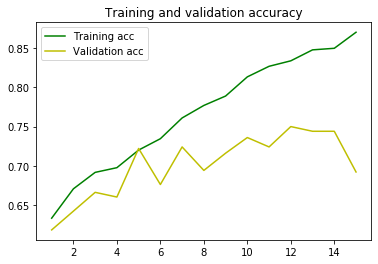

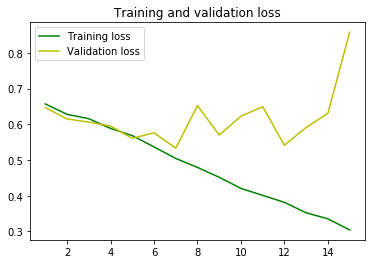

In [0]:
acc = train_history.history['acc']
val_acc = train_history.history['val_acc']
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

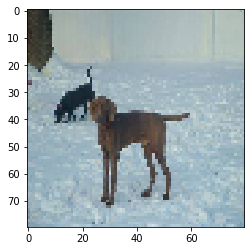

In [0]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [0]:
img_path = '/content/gdrive/My Drive/cat_and_dog/train_2500/dog.160.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(80, 80))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 80, 80, 3)


In [0]:
from tensorflow.python.keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [0]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[2]

print(first_layer_activation.shape)

(1, 40, 40, 64)


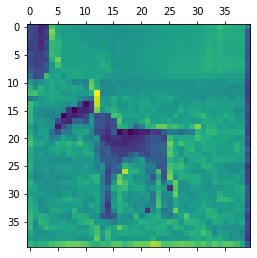

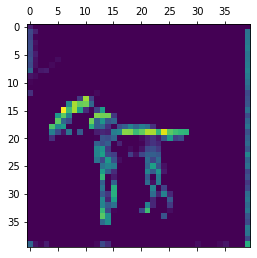

In [0]:
plt.matshow(first_layer_activation[0, :, :, 1], cmap = 'viridis')
plt.matshow(first_layer_activation[0, :, :, 40], cmap = 'viridis')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


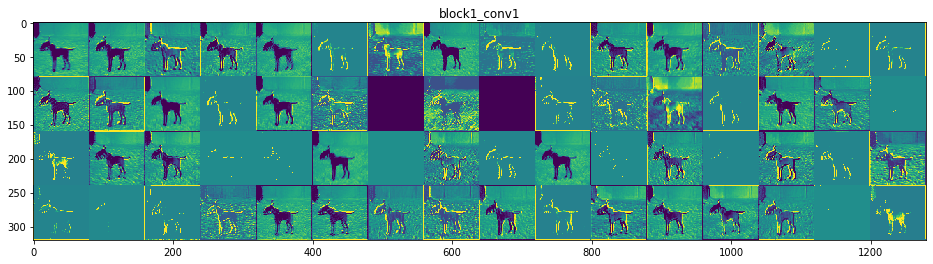

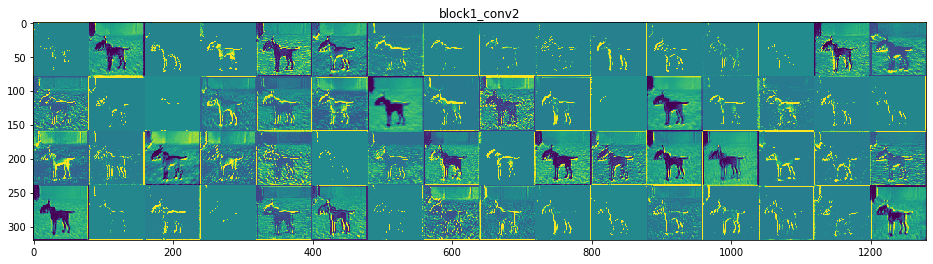

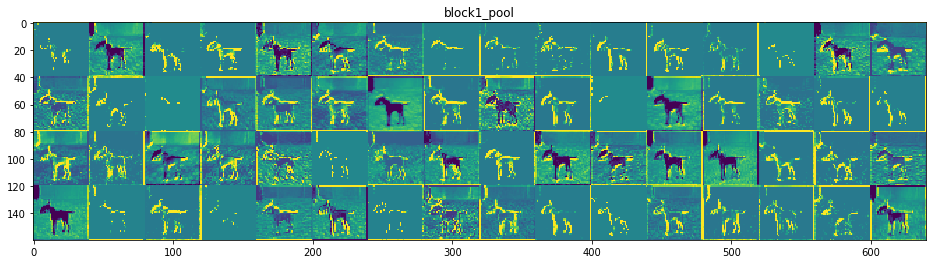

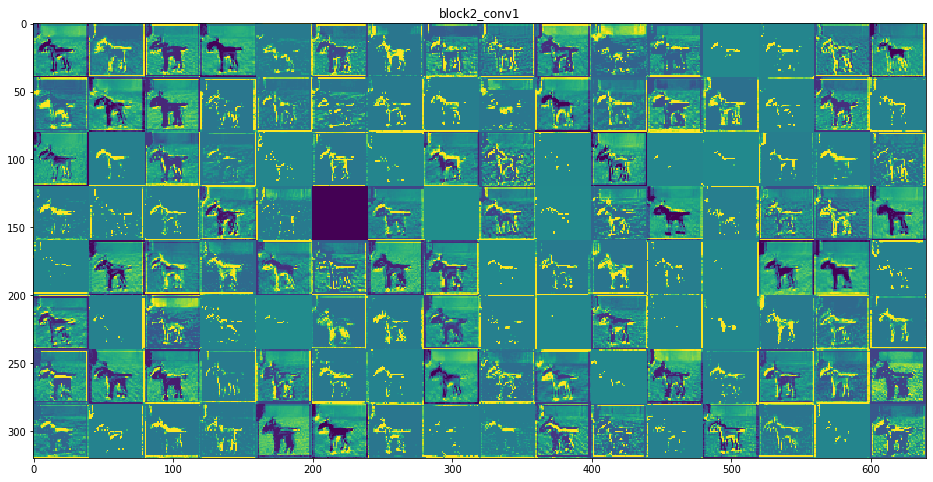

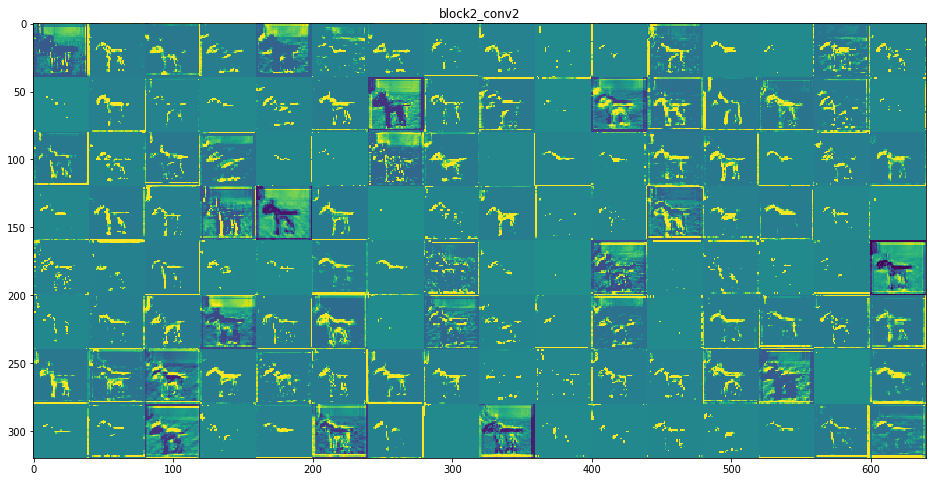

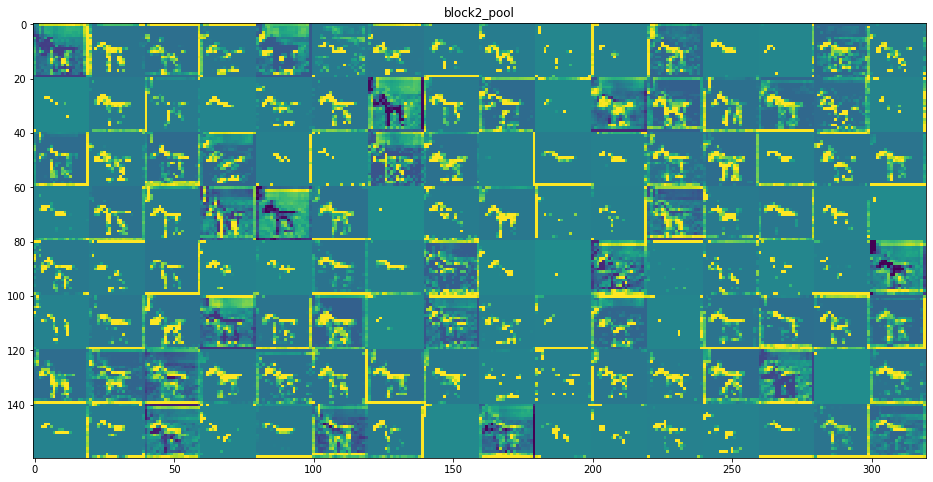

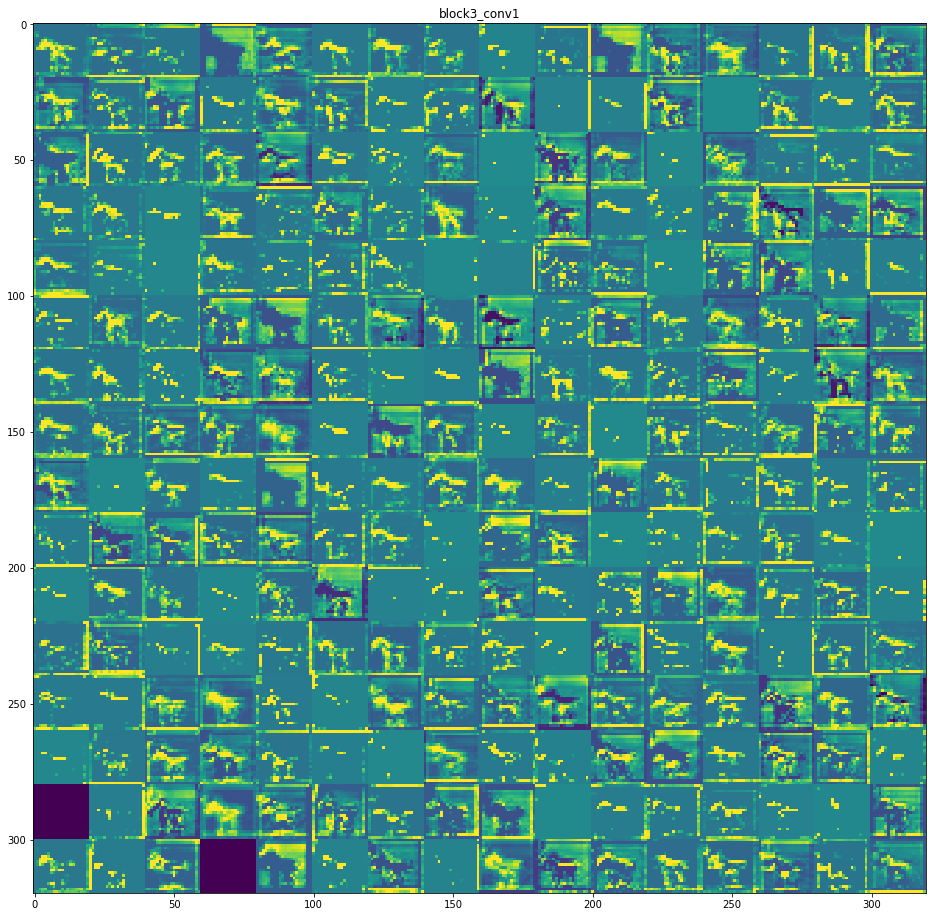

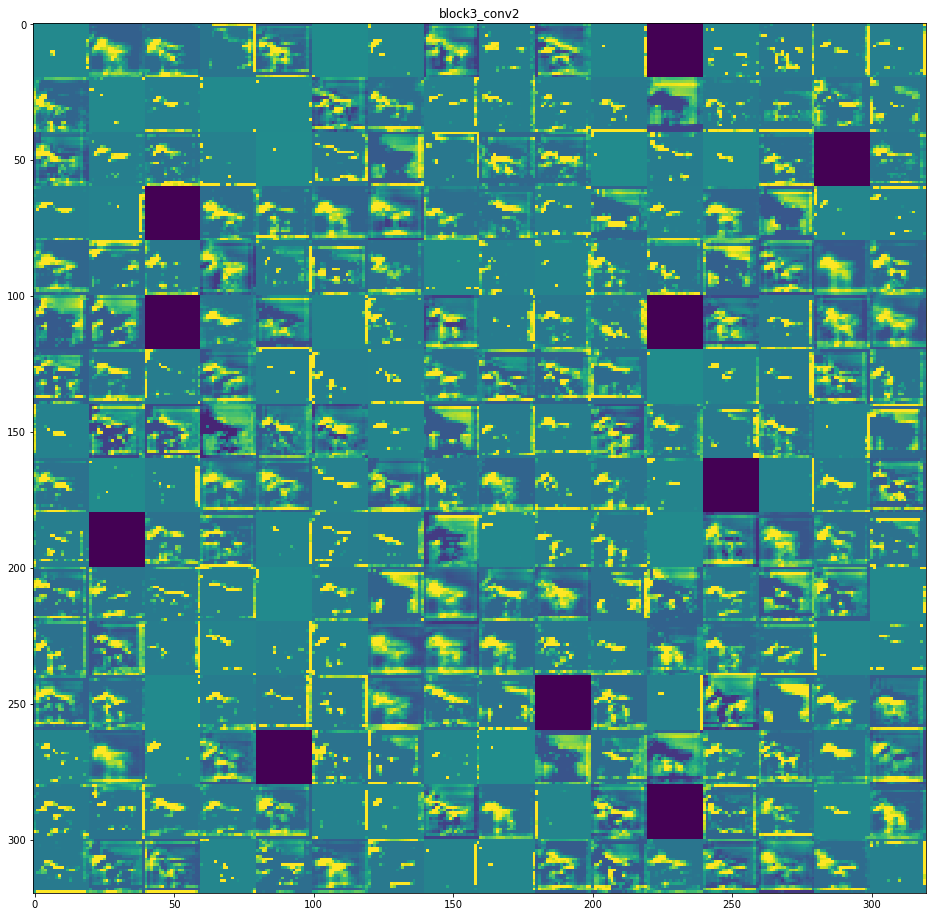

In [0]:
#층의 이름을 그래프 제목으로
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# 여기서부터가 특징맵 출력하는 부분입니다.
for layer_name, layer_activation in zip(layer_names, activations):
    # 특징의 수를 뜻합니다.
    # 각 특징의 채널의 수..
    n_features = layer_activation.shape[-1]

    # 특징맵의 크기는 (1, size, size, n_features)입니다., 1은 batch_size
    # layer_activation.shape[1]이 이미지의 width, height거든요.
    size = layer_activation.shape[1]

    # 활성화를 보여주기위한 grid를 정의합니다. 
    n_cols = n_features // images_per_row # 열의 갯수를 16개의 단위로 보여주고 싶어서입니다.
                                           #첫번째 층은 32개니 2개의 row
        
    #이미지가 들어가야할 픽셀 갯수라고 생각하시면 됩니다.
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # 각 활성화를 채우는 부분.
    # 특성맵 갯수에 따른 행의 길이 : n_cols
    for col in range(n_cols):
        # 8개씩 채우면서.
        for row in range(images_per_row): #모든 레이어를 
            # 모든 채널을 사용하겠다.
            channel_image = layer_activation[0, :, :,col * images_per_row + row]
            # 픽셀로 표현하기 위해.
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            # np.clip은 relu같은 느낌입니다. 0밑은 전부 0, 255 위는 전부 255로.
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()